# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [2]:
import pandas as pd

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv('SINASC_RO_2019.csv')

# Calcular a idade média das mães e dos pais por município
resultado = df.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].mean()

# Exibir o resultado
print(resultado)


C:\Users\User\AppData\Local\Temp\ipykernel_9248\342011232.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  resultado = df.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].mean()


                            IDADEMAE   IDADEPAI
munResNome                                     
Alta Floresta D'Oeste      25.991826  29.548701
Alto Alegre dos Parecis    24.844156  29.179104
Alto Paraíso               24.960177  28.833333
Alvorada D'Oeste           25.770732  30.757282
Ariquemes                  25.607866  32.466667
Buritis                    25.559177  30.812500
Cabixi                     26.037500  34.333333
Cacaulândia                25.546667  36.333333
Cacoal                     26.890102  30.931854
Campo Novo de Rondônia     24.825301  30.500000
Candeias do Jamari         25.243323  29.894737
Castanheiras               27.281250  30.392857
Cerejeiras                 27.240506  31.652778
Chupinguaia                25.333333  29.629630
Colorado do Oeste          27.602804  34.354839
Corumbiara                 24.716535  32.470588
Costa Marques              24.412017  30.613636
Cujubim                    24.482927  31.400000
Espigão D'Oeste            26.093333  31

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1526566718.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  resultado = df.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].mean()


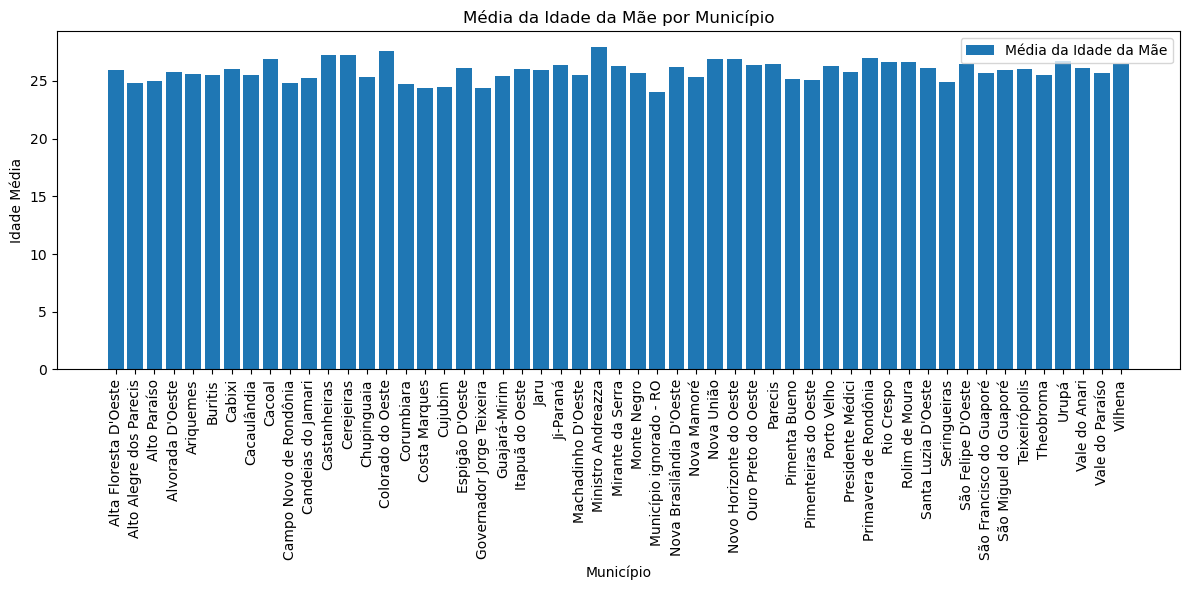

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv('SINASC_RO_2019.csv')

# Calcular a idade média das mães e dos pais por município
resultado = df.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].mean()

# Criar um gráfico de barras para a idade média das mães
plt.figure(figsize=(12, 6))
plt.bar(resultado.index, resultado['IDADEMAE'], label='Média da Idade da Mãe')
plt.xlabel('Município')
plt.ylabel('Idade Média')
plt.title('Média da Idade da Mãe por Município')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [4]:
import pandas as pd

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv('SINASC_RO_2019.csv')

# Defina a data de aniversário (no formato 'dd/mm')
data_aniversario = '10/01'

# Filtrar os dados para o dia de aniversário específico
df_aniversario = df[df['DTNASC'].str.endswith(data_aniversario)]

# Calcular o peso médio dos bebês por sexo e faixa de escolaridade da mãe
resultado = df_aniversario.groupby(['ESCMAE', 'SEXO'])['PESO'].mean()

# Resetar o índice para tornar o resultado mais legível
resultado = resultado.reset_index()

# Renomear as colunas
resultado = resultado.rename(columns={'ESCMAE': 'Escolaridade da Mãe', 'SEXO': 'Sexo', 'PESO': 'Peso Médio'})

# Exibir o resultado
print(resultado)


Empty DataFrame
Columns: [Escolaridade da Mãe, Sexo, Peso Médio]
Index: []


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [6]:
import pandas as pd

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv('SINASC_RO_2019.csv')

# Encontrar o município com o menor número de nascimentos em 2019
menos_nascimentos_municipio = df['munResNome'].value_counts().idxmin()

# Filtrar o DataFrame apenas para o município com o menor número de nascimentos
df_municipio = df[df['munResNome'] == menos_nascimentos_municipio]

# Calcular a idade média, máxima e mínima das mães nesse município
idade_media_mae = df_municipio['IDADEMAE'].mean()
idade_maxima_mae = df_municipio['IDADEMAE'].max()
idade_minima_mae = df_municipio['IDADEMAE'].min()

# Calcular a idade média, máxima e mínima dos pais nesse município
idade_media_pai = df_municipio['IDADEPAI'].mean()
idade_maxima_pai = df_municipio['IDADEPAI'].max()
idade_minima_pai = df_municipio['IDADEPAI'].min()

# Exibir os resultados
print(f"O município com menos nascimentos em 2019: {menos_nascimentos_municipio}")
print(f"Idade média das mães nesse município: {idade_media_mae:.2f} anos")
print(f"Idade máxima das mães nesse município: {idade_maxima_mae} anos")
print(f"Idade mínima das mães nesse município: {idade_minima_mae} anos")
print(f"Idade média dos pais nesse município: {idade_media_pai:.2f} anos")
print(f"Idade máxima dos pais nesse município: {idade_maxima_pai} anos")
print(f"Idade mínima dos pais nesse município: {idade_minima_pai} anos")


O município com menos nascimentos em 2019: Município ignorado - RO
Idade média das mães nesse município: 24.00 anos
Idade máxima das mães nesse município: 24 anos
Idade mínima das mães nesse município: 24 anos
Idade média dos pais nesse município: 22.00 anos
Idade máxima dos pais nesse município: 22.0 anos
Idade mínima dos pais nesse município: 22.0 anos


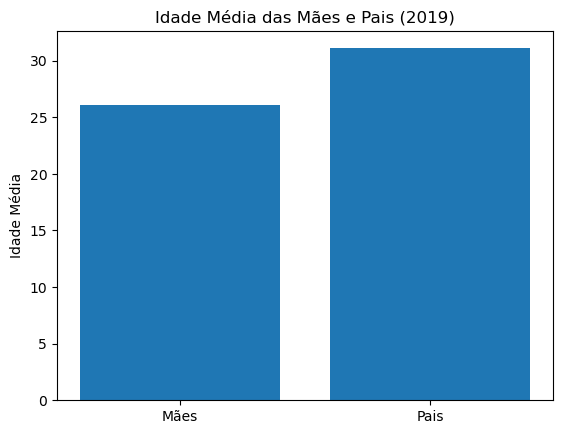

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv('SINASC_RO_2019.csv')

# Calcular a idade média das mães e dos pais
idade_media_mae = df['IDADEMAE'].mean()
idade_media_pai = df['IDADEPAI'].mean()

# Criar um gráfico de barras
fig, ax = plt.subplots()
idades = ['Mães', 'Pais']
medias = [idade_media_mae, idade_media_pai]

ax.bar(idades, medias)
ax.set_ylabel('Idade Média')
ax.set_title('Idade Média das Mães e Pais (2019)')
plt.show()



### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [10]:
import pandas as pd

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv('SINASC_RO_2019.csv')


In [11]:
# Calcular a quantidade média de filhos vivos
quantidade_media_filhos = df['QTDFILVIVO'].mean()

# Calcular a idade média dos pais
idade_media_pai = df['IDADEPAI'].mean()


Média

In [12]:
print(f"Quantidade média de filhos vivos: {quantidade_media_filhos:.2f}")
print(f"Idade média dos pais: {idade_media_pai:.2f} anos")


Quantidade média de filhos vivos: 1.05
Idade média dos pais: 31.09 anos


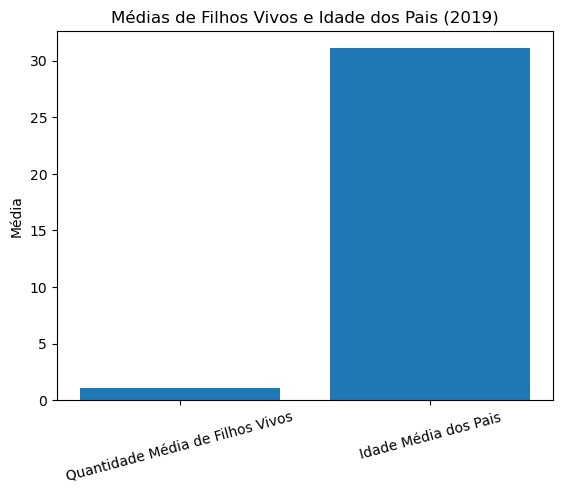

In [13]:
import matplotlib.pyplot as plt

# Categorias para o gráfico
categorias = ['Quantidade Média de Filhos Vivos', 'Idade Média dos Pais']
medias = [quantidade_media_filhos, idade_media_pai]

# Criar um gráfico de barras
fig, ax = plt.subplots()
ax.bar(categorias, medias)
ax.set_ylabel('Média')
ax.set_title('Médias de Filhos Vivos e Idade dos Pais (2019)')
plt.xticks(rotation=15)
plt.show()


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')